In [78]:
#read diabetes.csv and pick column names from column headings file. column name should be clean without anything in () remove special chars from column name

import pandas

df1 = pandas.read_csv('C:\Local\python-training\Day-4\diabetes column heading.txt', header=None)

df1[0] = df1[0].str.replace(r'(\d. )|[$@#]|\(.*\)',' ', regex=True)

new_row=pandas.Series(df1[0])
df = pandas.read_csv('C:\Local\python-training\Day-4\diabetes_data_raw.csv', header=None, sep=' ')

#Push all rows 1 down and set the 0th row as new_row
df.loc[1:] = df.loc[:]
df.loc[0] = new_row

#Set the first row as column
df.columns = df.iloc[0]
df = df[1:]

#Drop all the columns with NaN title
df = df.loc[:, df.columns.notna()]
df



C:\Users\SESA509164\AppData\Local\Temp\ipykernel_12620\3291124054.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value ' Age' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[0] = new_row
C:\Users\SESA509164\AppData\Local\Temp\ipykernel_12620\3291124054.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value ' Number of times pregnant' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[0] = new_row
C:\Users\SESA509164\AppData\Local\Temp\ipykernel_12620\3291124054.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value ' Plasma glucose concentration' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0] = new_row
C:\Users\SESA509164\AppData\Local\

,Age,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function
1,48,1,21.6,87.0,183,103.2,70.0,3.0
2,72,2,30.5,93.0,156,93.6,41.0,4.0
3,24,1,25.3,84.0,198,131.4,40.0,5.0
4,50,1,23.0,101.0,192,125.4,52.0,4.0
5,23,1,22.6,89.0,139,64.8,61.0,2.0
...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.0,185,113.8,42.0,4.0
438,47,2,24.9,75.0,225,166.0,42.0,5.0
439,60,2,24.9,99.67,162,106.6,43.0,3.77
440,36,1,30.0,95.0,201,125.2,42.0,4.79


In [79]:
#1.1 remove all rows where special chars are there
nan_count=df.isna().sum()
nan_count


0
 Age                             0
 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic  blood pressure       0
 Triceps skinfold thickness      0
 2-Hour serum    insulin         0
 Body mass index                 0
 Diabetes   pedigree function    0
dtype: int64

In [80]:
#1.2 remove special chars from column names if any
#put a good regex there insted of #
df.columns = df.columns.str.replace('#', '')
df

,Age,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function
1,48,1,21.6,87.0,183,103.2,70.0,3.0
2,72,2,30.5,93.0,156,93.6,41.0,4.0
3,24,1,25.3,84.0,198,131.4,40.0,5.0
4,50,1,23.0,101.0,192,125.4,52.0,4.0
5,23,1,22.6,89.0,139,64.8,61.0,2.0
...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.0,185,113.8,42.0,4.0
438,47,2,24.9,75.0,225,166.0,42.0,5.0
439,60,2,24.9,99.67,162,106.6,43.0,3.77
440,36,1,30.0,95.0,201,125.2,42.0,4.79


In [81]:
#1.2.1 find the outliers in the dataframe. you can use 3 SD technique or IQR method or box plot 
# import numpy as np
# from scipy.stats import zscore
# outliers = df[(np.abs(zscore(df)) > 3).all(axis=1)]

means = df.mean()
stddevs = df.std()

# How many sigmas
sd_limit=3

# distance of data from mean
diff = (df-means)

# Find the indices of outliers in each column
outlier_indices = (diff.abs() > sd_limit*stddevs).any(axis=1)

# Filter the DataFrame to get rows with outliers
outliers = df[outlier_indices]

outliers


,Age,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function
58,60,1,20.4,105.0,198,78.4,99.0,2.0
123,50,2,29.6,94.33,300,242.4,33.0,9.09
216,52,2,29.7,109.0,228,162.8,31.0,8.0
230,38,2,33.0,78.0,301,215.0,50.0,6.02
256,35,1,41.3,81.0,168,102.8,37.0,5.0
260,60,1,25.6,78.0,195,95.4,91.0,2.0
261,62,1,22.5,125.0,215,99.0,98.0,2.0
269,51,1,23.4,87.0,220,108.8,93.0,2.0
322,55,2,32.1,112.67,207,92.4,25.0,8.28
336,43,1,34.3,84.0,256,172.6,33.0,8.0


In [82]:
#1.3 replace outliers with mean value of that column (you can use 3 Standard deviation technique, IQR method) to find outlier 
for column in df.columns:
    df.loc[outlier_indices, column] = means[column]

df[outlier_indices]

,Age,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function
58,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
123,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
216,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
230,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
256,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
260,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
261,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
269,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
322,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408
336,48.494331,1.46712,26.362812,94.632608,189.213152,115.489569,49.815193,4.070408


In [83]:
#2. count all zeros in every column, Replace all the 0 values with NaN in a df and count them again

df_zeros =df[df==0]
df_zeros

,Age,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#3. Create a copy of original dataframe and remove all the rows where missing values are there and count number of rows before and after droping it

df_copy = pandas.read_csv('C:\Local\python-training\Day-4\diabetes_data_raw.csv', header=None, sep=' ')
rows_count_before = len(df_copy)
df_cleaned = df_copy.dropna()
rows_count_after = len(df_cleaned)
rows_count_before,rows_count_after


(442, 442)

In [85]:
#4. in the original data frame Impute/put the mean value in place of missing values of that column and cross check if all missing values have been imputed or not

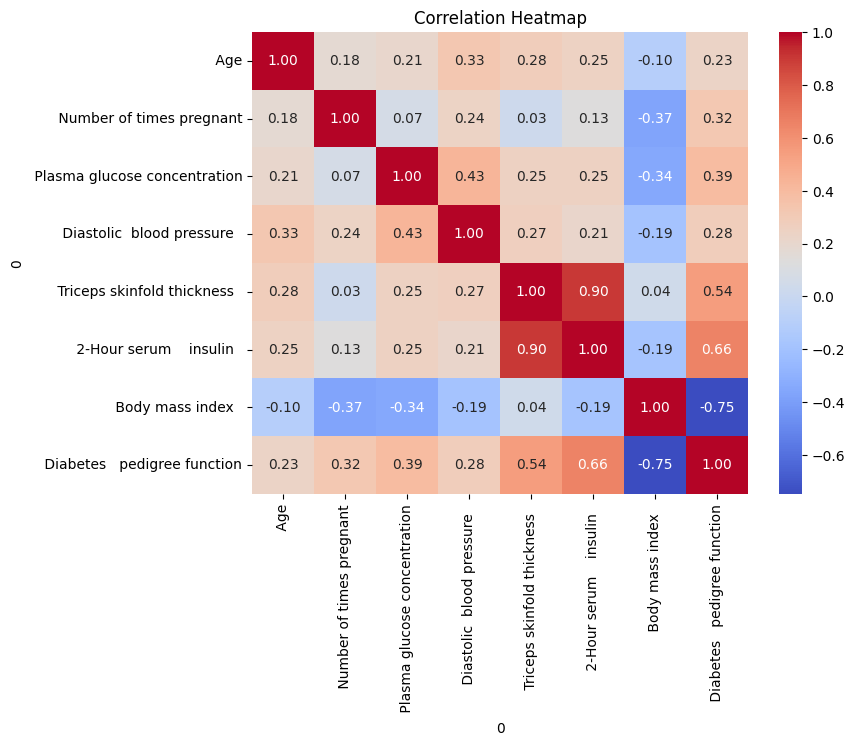

In [86]:
#5 create a heat map showing correlation between variables
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [87]:
#6 find the variance in each column

df.var()

0
 Age                              169.725191
 Number of times pregnant           0.242785
 Plasma glucose concentration      17.798037
 Diastolic  blood pressure         184.71578
 Triceps skinfold thickness      1111.919108
 2-Hour serum    insulin          845.883199
 Body mass index                  139.397992
 Diabetes   pedigree function        1.44648
dtype: object

In [88]:
#7 find the missing value ratio for every column (missing value ratio means missing value divided by total number of values in a column)
missing_value_ratio = df.isna().sum()/len(df)

missing_value_ratio

0
 Age                             0.0
 Number of times pregnant        0.0
 Plasma glucose concentration    0.0
 Diastolic  blood pressure       0.0
 Triceps skinfold thickness      0.0
 2-Hour serum    insulin         0.0
 Body mass index                 0.0
 Diabetes   pedigree function    0.0
dtype: float64

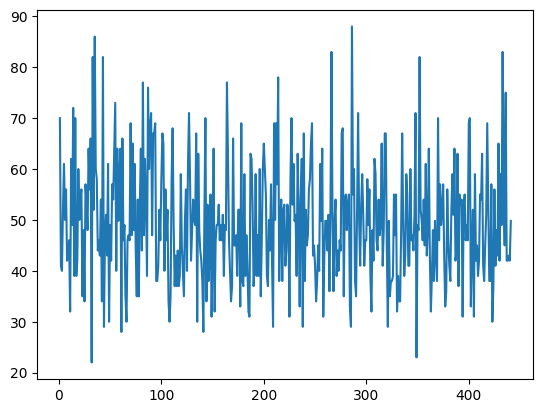

In [89]:
import matplotlib.pyplot as plt

plt.plot(df[' Body mass index  '])
plt.show()